In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv (r"C:\Users\hp\Downloads\RAKAMIN BOOTCAMP\final project dataset\4\dataset.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217,1
1,2.0,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183,0
2,3.0,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27,1
3,4.0,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203,0
4,5.0,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400164 entries, 0 to 400163
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    396486 non-null  float64
 1   Gender                396807 non-null  object 
 2   Age                   400164 non-null  int64  
 3   Driving_License       400164 non-null  int64  
 4   Region_Code           400164 non-null  float64
 5   Previously_Insured    398165 non-null  float64
 6   Vehicle_Age           400164 non-null  object 
 7   Vehicle_Damage        399071 non-null  object 
 8   Annual_Premium        400164 non-null  float64
 9   Policy_Sales_Channel  399623 non-null  float64
 10  Vintage               400164 non-null  int64  
 11  Response              400164 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 36.6+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,396486.000000,400164.000000,400164.000000,400164.000000,398165.000000,400164.000000,399623.000000,400164.000000,400164.000000
mean,190574.916885,38.827221,0.997886,26.389008,0.458383,30560.973126,112.013295,154.379937,0.122570
std,110008.424002,15.512161,0.045931,13.235256,0.498266,17206.674052,54.209897,83.673923,0.327943
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95279.250000,25.000000,1.000000,15.000000,0.000000,24404.000000,29.000000,82.000000,0.000000
50%,190634.500000,36.000000,1.000000,28.000000,0.000000,31670.000000,132.000000,154.000000,0.000000
75%,285814.750000,49.000000,1.000000,35.000000,1.000000,39394.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#missing values
print(df.isnull().sum())

id                      3678
Gender                  3357
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured      1999
Vehicle_Age                0
Vehicle_Damage          1093
Annual_Premium             0
Policy_Sales_Channel     541
Vintage                    0
Response                   0
dtype: int64


In [6]:
#cek data duplikat
df.duplicated().any()

True

## Data Cleaning

### Handle missing value

In [8]:
#fill kolom 'id' dengan meneruskan row yang hilang
df.loc[df[df['id'].isna()].index, 'id'] = df[df['id'].isna()].index + 1

#fill kolom 'Gender' dengan nilai mode
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)

#drop nan values pada semua kolom
df = df.dropna()

print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


### Change Dtypes

In [86]:
df= df.astype({
    'id' : 'int',
    'Region_Code' : 'int',
    'Previously_Insured' : 'int',
    'Annual_Premium' : 'int',
    'Policy_Sales_Channel' : 'int'
})

### Handle Duplicates Data

In [12]:
df = df.drop_duplicates()
df.duplicated().any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    378137 non-null  float64
 1   Gender                378137 non-null  object 
 2   Age                   378137 non-null  int64  
 3   Driving_License       378137 non-null  int64  
 4   Region_Code           378137 non-null  float64
 5   Previously_Insured    378137 non-null  float64
 6   Vehicle_Age           378137 non-null  object 
 7   Vehicle_Damage        378137 non-null  object 
 8   Annual_Premium        378137 non-null  float64
 9   Policy_Sales_Channel  378137 non-null  float64
 10  Vintage               378137 non-null  int64  
 11  Response              378137 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 37.5+ MB


### Feature Encoding

In [16]:
# Label Encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [17]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, prefix=['Vehicle_Age'])
df_encoded = df_encoded.astype(int)

df_cleaned = df_encoded
df_cleaned.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,2,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,3,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,4,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,5,0,29,1,41,1,0,27496,152,39,0,0,1,0


### Handling Outliers

### Features Transformation

In [103]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_copy = df_minmax
df_copy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0.000000,1.0,0.369231,1.0,0.538462,0.0,1.0,0.070366,0.154321,0.716263,1.0,0.0,0.0,1.0
1,0.000002,1.0,0.861538,1.0,0.057692,0.0,0.0,0.057496,0.154321,0.598616,0.0,1.0,0.0,0.0
2,0.000005,1.0,0.415385,1.0,0.538462,0.0,1.0,0.066347,0.154321,0.058824,1.0,0.0,0.0,1.0
3,0.000007,1.0,0.015385,1.0,0.211538,1.0,0.0,0.048348,0.932099,0.667820,0.0,0.0,1.0,0.0
4,0.000010,0.0,0.138462,1.0,0.788462,1.0,0.0,0.046259,0.932099,0.100346,0.0,0.0,1.0,0.0


### Hande Class Imbalance

# Exploratory Data Analysis (EDA)

In [25]:
df_cleaned.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000
mean,190618.045830,0.544639,38.824159,0.997871,26.387656,0.458278,0.504833,30565.969865,112.029344,154.333421,0.122522,0.525566,0.432401,0.042032
std,110078.312533,0.498004,15.512508,0.046090,13.230263,0.498257,0.499977,17209.746438,54.202608,83.675933,0.327888,0.499347,0.495410,0.200663
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,95271.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24408.000000,29.000000,82.000000,0.000000,0.000000,0.000000,0.000000
50%,190654.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31671.000000,132.000000,154.000000,0.000000,1.000000,0.000000,0.000000
75%,285955.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,1.000000,0.000000
max,400067.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_cleaned.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,1.000000,0.001052,0.001723,-0.000496,-0.000330,0.002385,-0.001481,0.003267,-0.002893,-0.000541,-0.001307,0.001534,-0.001422,-0.000307
Gender,0.001052,1.000000,0.144508,-0.018615,0.000276,-0.081111,0.091009,0.003946,-0.110148,-0.002685,0.051824,0.146211,-0.164914,0.043308
Age,0.001723,0.144508,1.000000,-0.079844,0.042590,-0.254521,0.267396,0.067674,-0.577634,-0.001426,0.111117,0.692753,-0.787731,0.220899
Driving_License,-0.000496,-0.018615,-0.079844,1.000000,-0.000993,0.015191,-0.016940,-0.012092,0.043543,-0.000766,0.010260,-0.037335,0.040198,-0.006338
Region_Code,-0.000330,0.000276,0.042590,-0.000993,1.000000,-0.024517,0.027981,-0.010811,-0.042518,-0.002726,0.010805,0.038077,-0.044222,0.014426
Previously_Insured,0.002385,-0.081111,-0.254521,0.015191,-0.024517,1.000000,-0.824123,0.004113,0.219316,0.002726,-0.341131,-0.278869,0.358639,-0.191470
Vehicle_Damage,-0.001481,0.091009,0.267396,-0.016940,0.027981,-0.824123,1.000000,0.009523,-0.224377,-0.002378,0.354428,0.284595,-0.370724,0.207057
Annual_Premium,0.003267,0.003946,0.067674,-0.012092,-0.010811,0.004113,0.009523,1.000000,-0.113373,-0.000728,0.022721,-0.002346,-0.022805,0.062142
Policy_Sales_Channel,-0.002893,-0.110148,-0.577634,0.043543,-0.042518,0.219316,-0.224377,-0.113373,1.000000,-0.000079,-0.139251,-0.508123,0.571384,-0.146215
Vintage,-0.000541,-0.002685,-0.001426,-0.000766,-0.002726,0.002726,-0.002378,-0.000728,-0.000079,1.000000,-0.000993,-0.002790,0.002568,0.000602


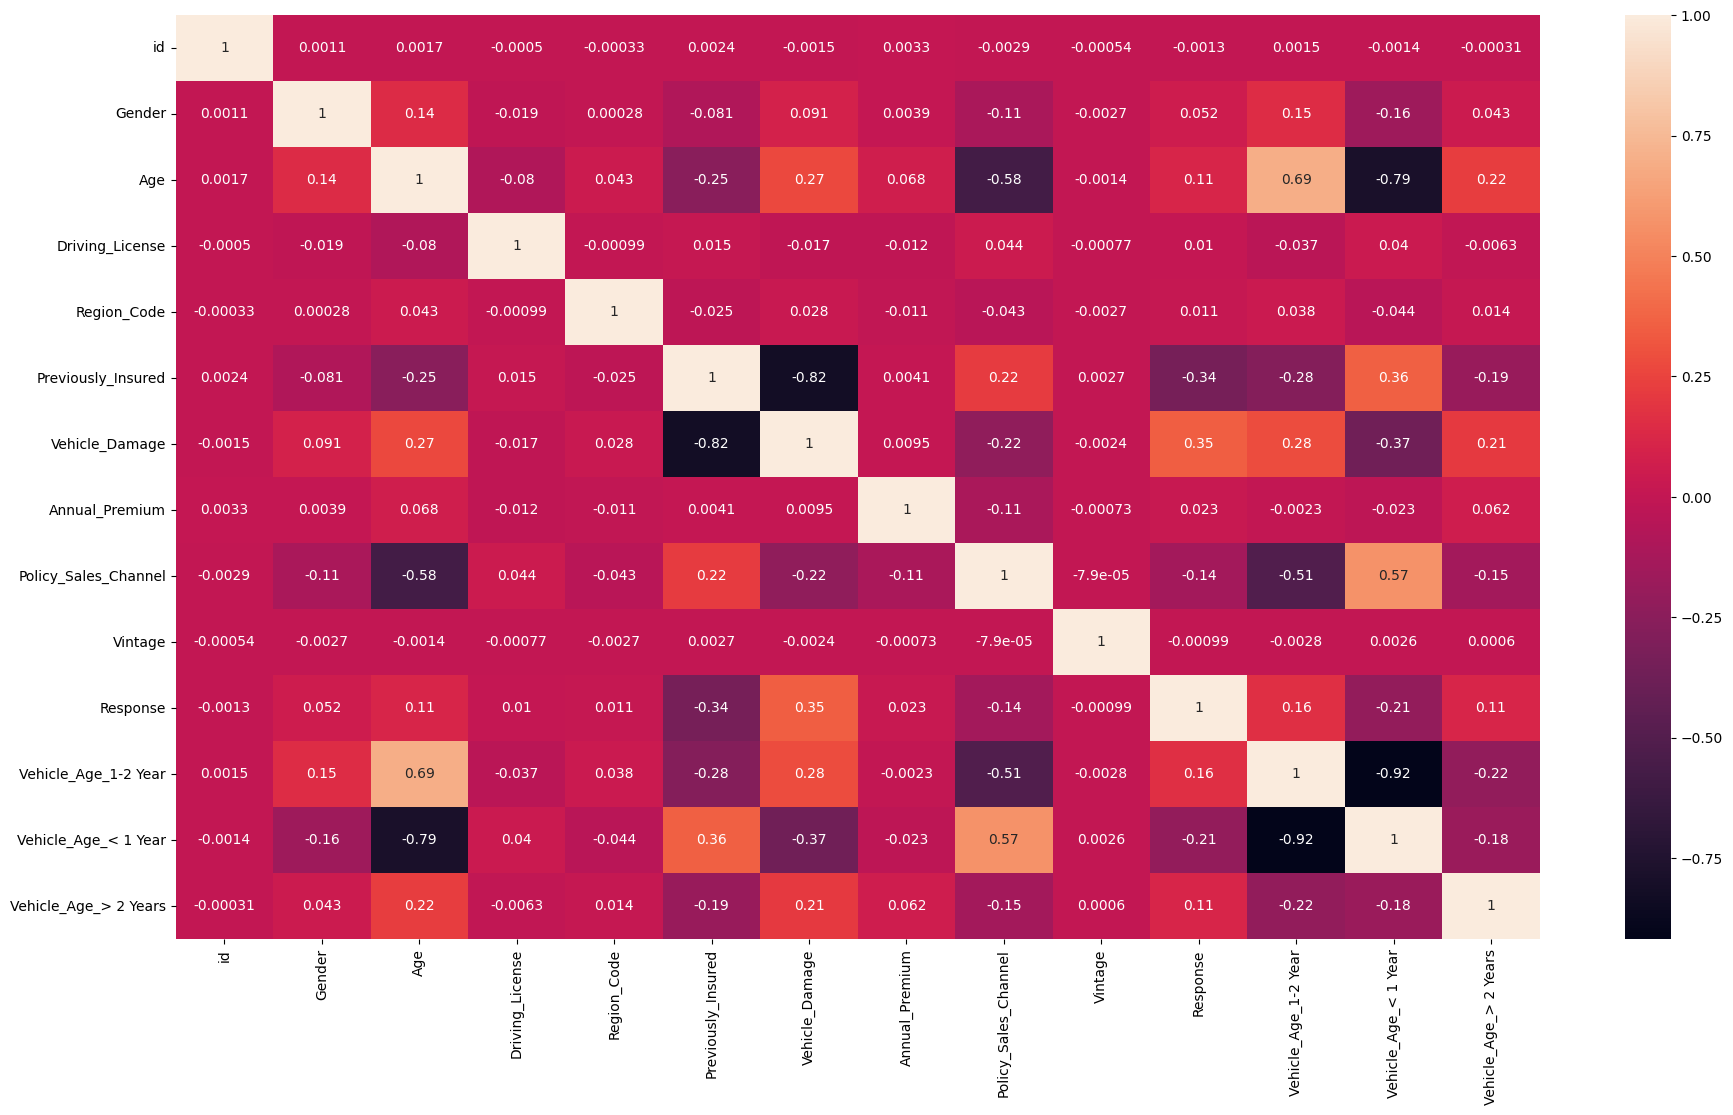

In [28]:
sns.heatmap(df_cleaned.corr(), annot = True)
plt.rcParams ['figure.figsize'] = (22,12)
plt.show()

In [46]:
grouped = df_cleaned.groupby('Response')
sorted_df = grouped.apply(lambda x: x.sort_values(by=["Previously_Insured", "Vehicle_Damage","Vehicle_Age_1-2 Year", "Vehicle_Age_< 1 Year","Vehicle_Age_> 2 Years"],ascending = False))
sorted_df

id  Gender  Age  Driving_License  Region_Code  \
Response                                                             
0        108        109       1   72                1           46   
         229        230       0   64                1           28   
         319        320       1   43                1            5   
         349        350       0   60                1           36   
         533        534       1   53                1           28   
...                 ...     ...  ...              ...          ...   
1        377613  377614       1   30                1           28   
         378069  378070       0   21                1           13   
         378639  378640       1   23                1           30   
         379304  379305       1   21                1           46   
         379724  379725       0   22                1           36   

                 Previously_Insured  Vehicle_Damage  Annual_Premium  \
Response                                                              
0        108                      1               1           28698   
         229                      1               1           41697   
         319                      1               1            2630   
         349                      1               1           36638   
         533                      1               1           36544   
...                             ...             ...             ...   
1        377613                   0               0            2630   
         378069                   0               0           25849   
         378639                   0               0            2630   
         379304                   0               0            2630   
         379724                   0               0           41703   

                 Policy_Sales_Channel  Vintage  Response  \
Response                                                   
0        108                       30      216         0   
         229                       26      287         0   
         319                      124      178         0   
         349                      124       33         0   
         533                       26      182         0   
...                               ...      ...       ...   
1        377613                   156      154         1   
         378069                   152      115         1   
         378639                   152      207         1   
         379304                   160      150         1   
         379724                   152      280         1   

                 Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  \
Response                                                      
0        108                        1                     0   
         229                        1                     0   
         319                        1                     0   
         349                        1                     0   
         533                        1                     0   
...                               ...                   ...   
1        377613                     0                     1   
         378069                     0                     1   
         378639                     0                     1   
         379304                     0                     1   
         379724                     0                     1   

                 Vehicle_Age_> 2 Years  
Response                                
0        108                         0  
         229                         0  
         319                         0  
         349                         0  
         533                         0  
...                                ...  
1        377613                      0  
         378069                      0  
         378639                      0  
         379304                      0  
         379724                      0  

[378137 rows x 14 columns]